#### Load libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

#### Load dataset

In [21]:
df = pd.read_csv('oversampled.csv')

In [22]:
good = df[df.target == 0].drop('target', axis = 1)
resonator = df[df.target == 1].drop('target', axis = 1)
centermass = df[df.target == 2].drop('target', axis = 1)
diaphragm = df[df.target == 3].drop('target', axis = 1)

In [23]:
times = np.array(good.columns[:-1])
time = [float(col) for col in times]

In [24]:
amplitude_nums = np.append([1, 2, 3, 4, 5], np.random.randint(0, 1000, 10))

### Apply Spectrogram

#### Generating function

In [25]:
def generate_spectrogram(rows, cols, height, width, data, ampltiude_nums, time, title):
    amplitudes = []

    for i in amplitude_nums:
        amplitude = np.array(data.iloc[i])
        amplitudes.append(amplitude)

    count = 0

    fig, axs = plt.subplots(rows, cols)
    fig.set_figheight(height)
    fig.set_figwidth(width)
    fig.suptitle('Spectrogram of ' + title)
    
    # Sampling frequency
    fs = 1 / (time[1] - time[0])
    
    for amplitude, ax in zip(amplitudes, axs.flat):
        # Compute the spectrogram
        frequencies, times, Sxx = signal.spectrogram(amplitude, fs)
        
        # Plot the spectrogram
        im = ax.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto')
        ax.set_title('Amplitude' + str(amplitude_nums[count]))  # Add title for each graph
        ax.set_ylabel('Frequency [Hz]')  # Add y-label for each graph
        ax.set_xlabel('Time [sec]')  # Add x-label for each graph
        count = count + 1
    
    # Create a separate axis for the colorbar
    cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Adjust position and size as needed
    
    # Add colorbar
    fig.colorbar(im, cax=cax, label='Power/Frequency (dB/Hz)')
    
    
    plt.show()    

#### Good Horn

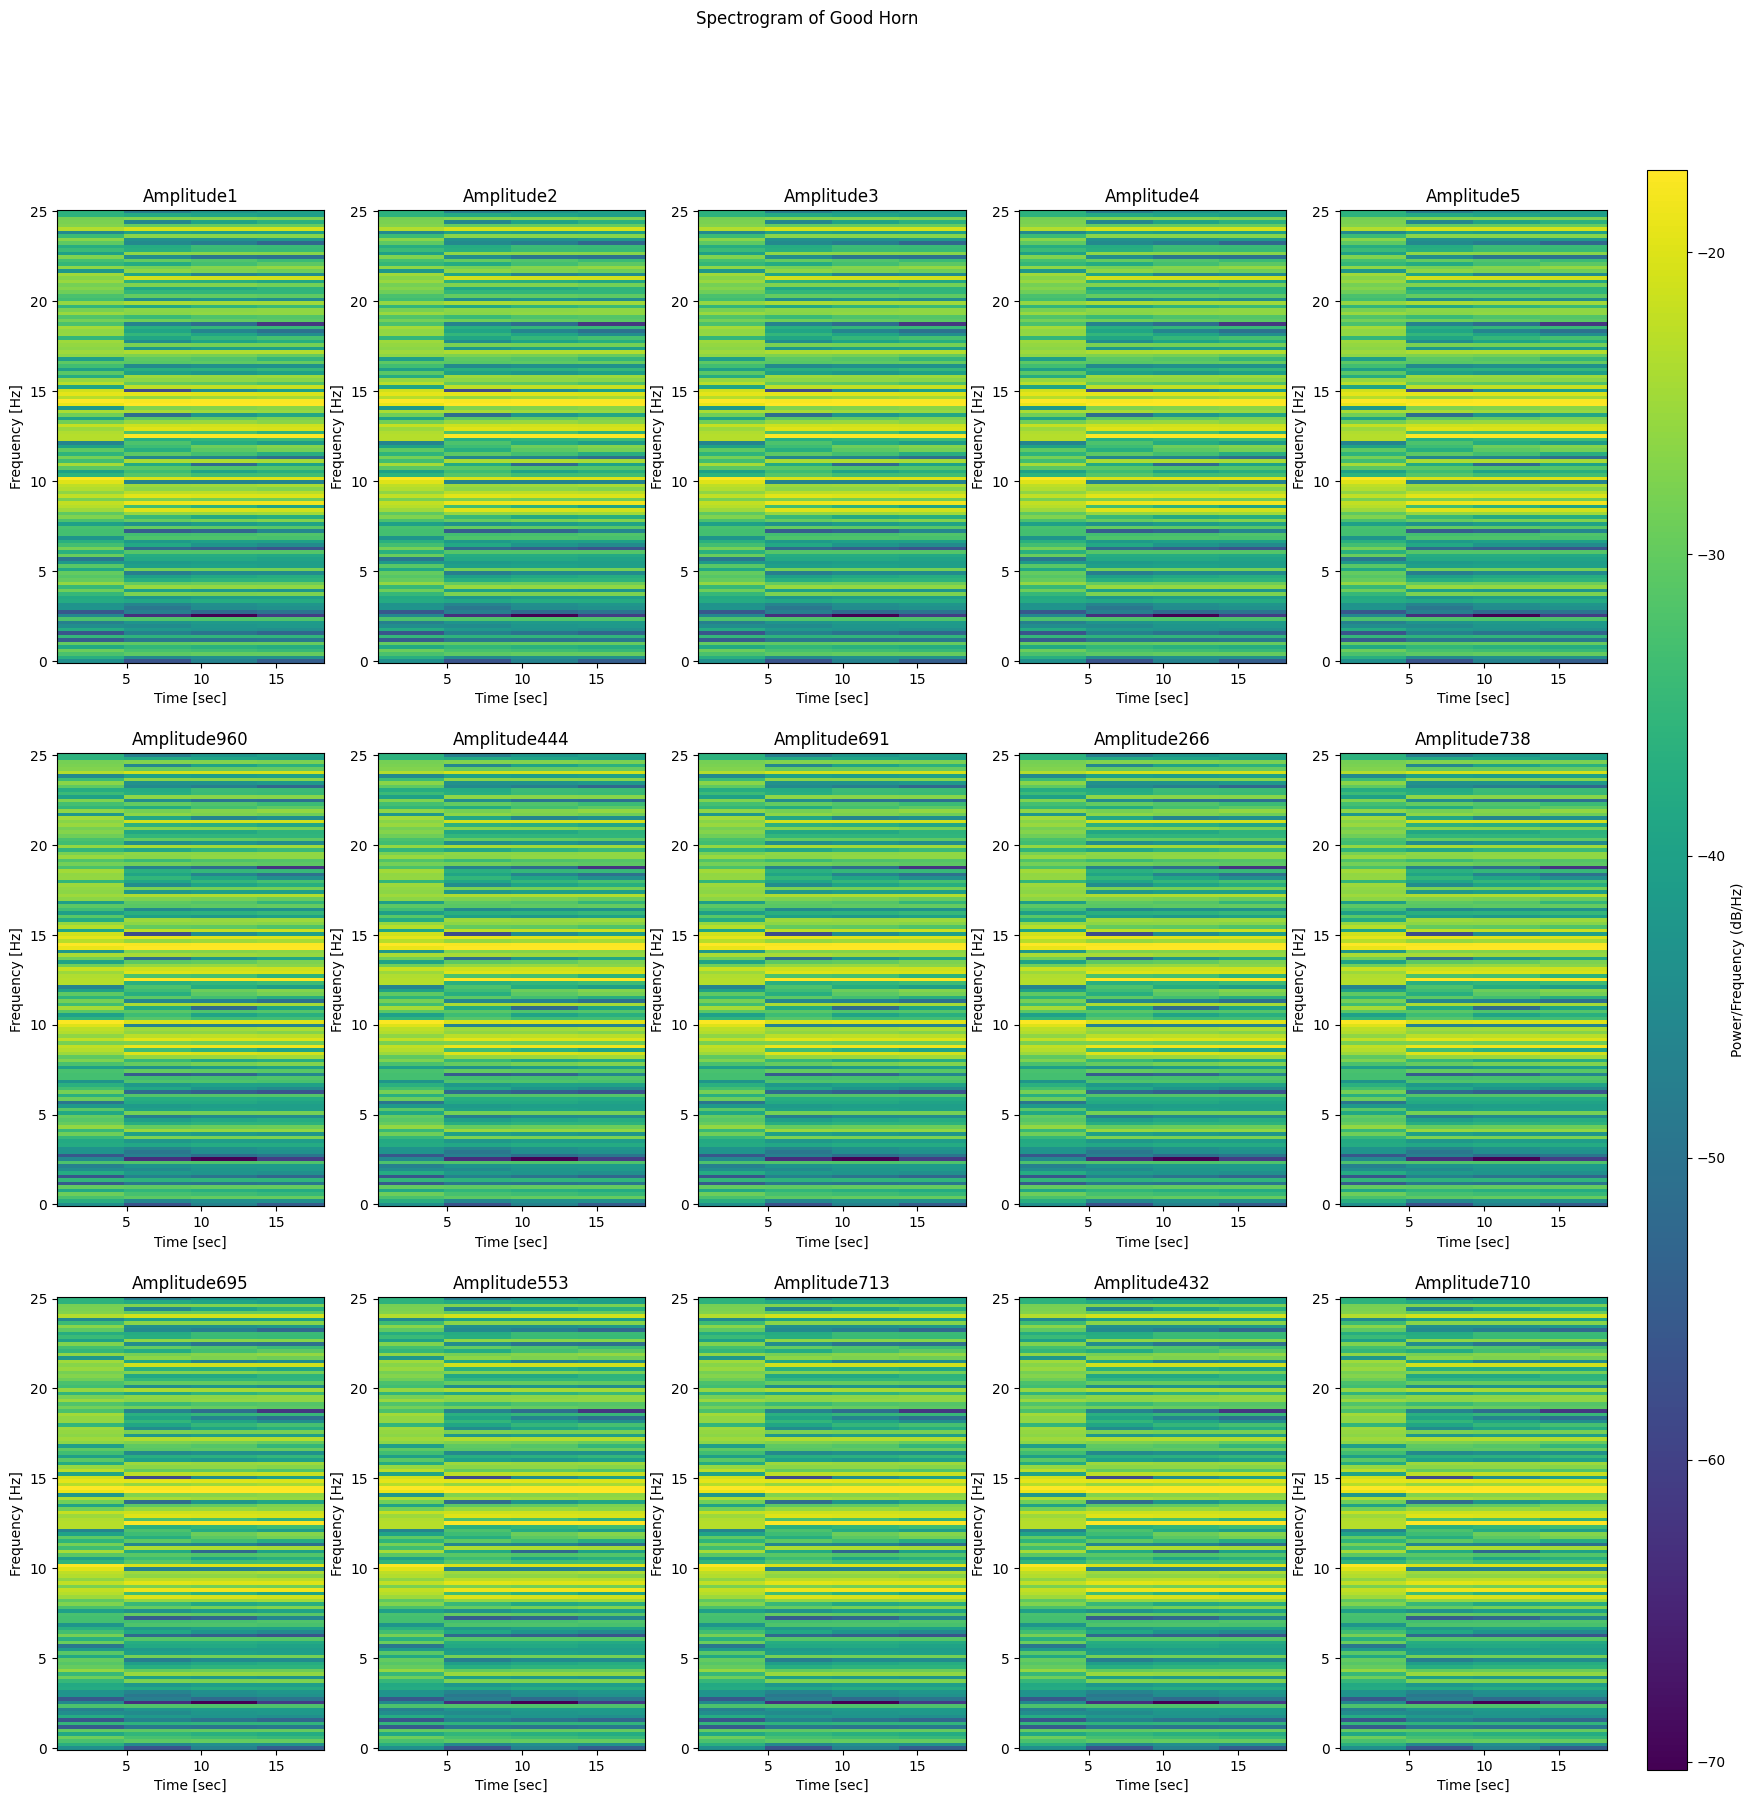

In [26]:
generate_spectrogram(3, 5, 20, 20, good, amplitude_nums, time, 'Good Horn')

#### Centermass Damage

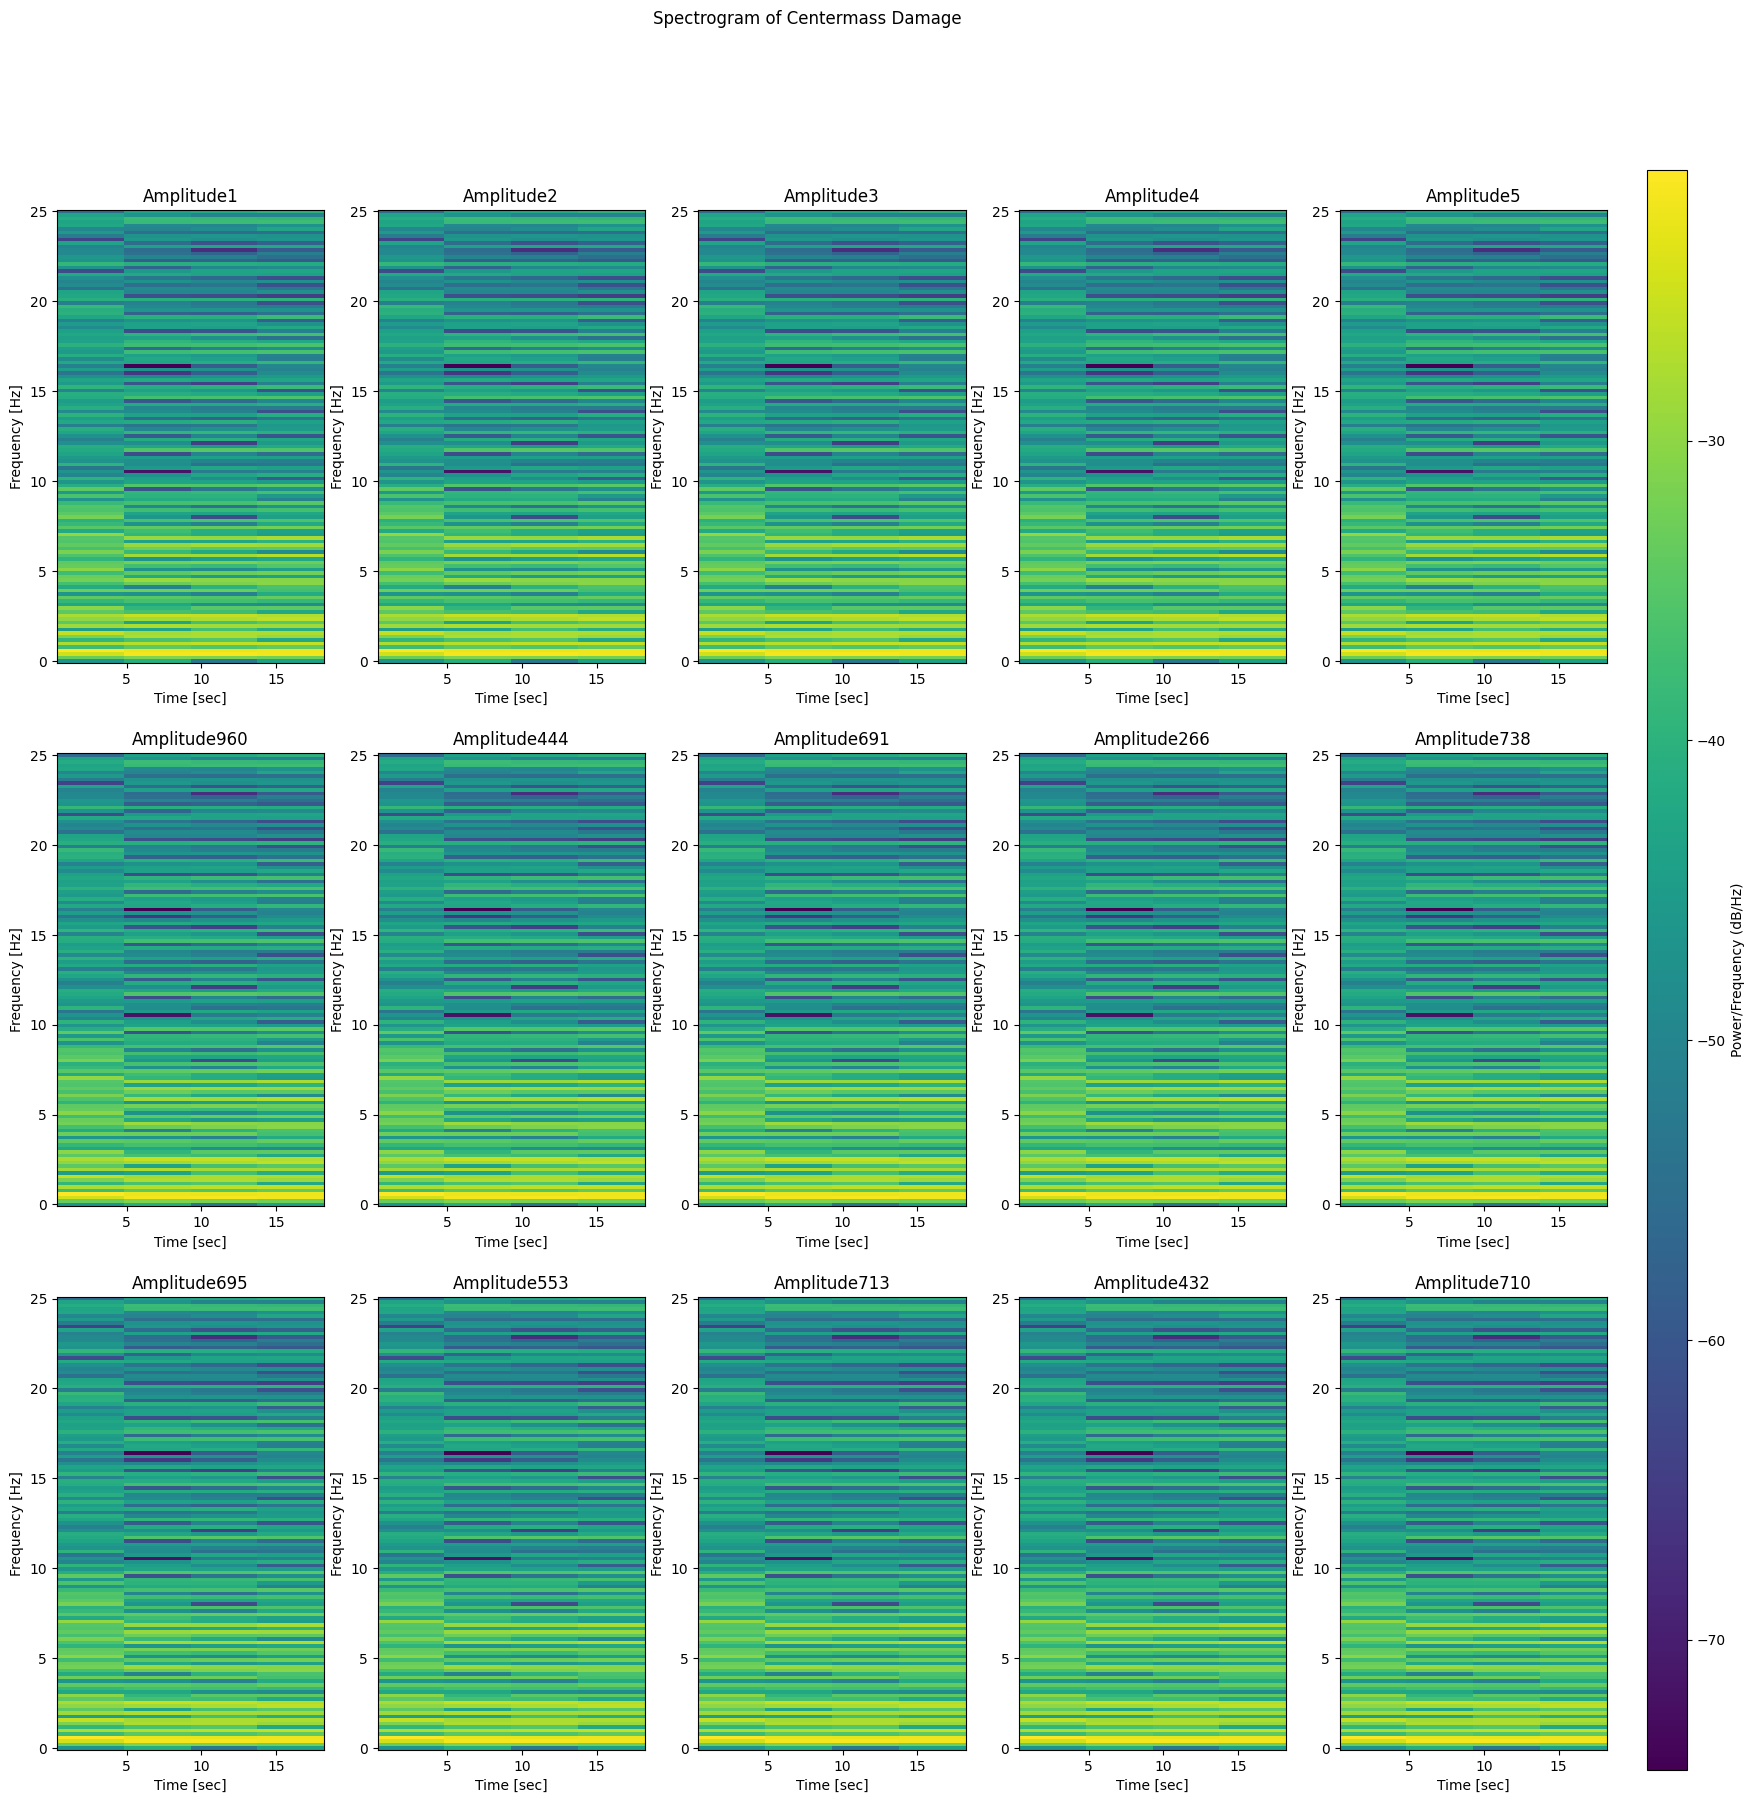

In [27]:
generate_spectrogram(3, 5, 20, 20, centermass, amplitude_nums, time, 'Centermass Damage')

#### Resonator Damage

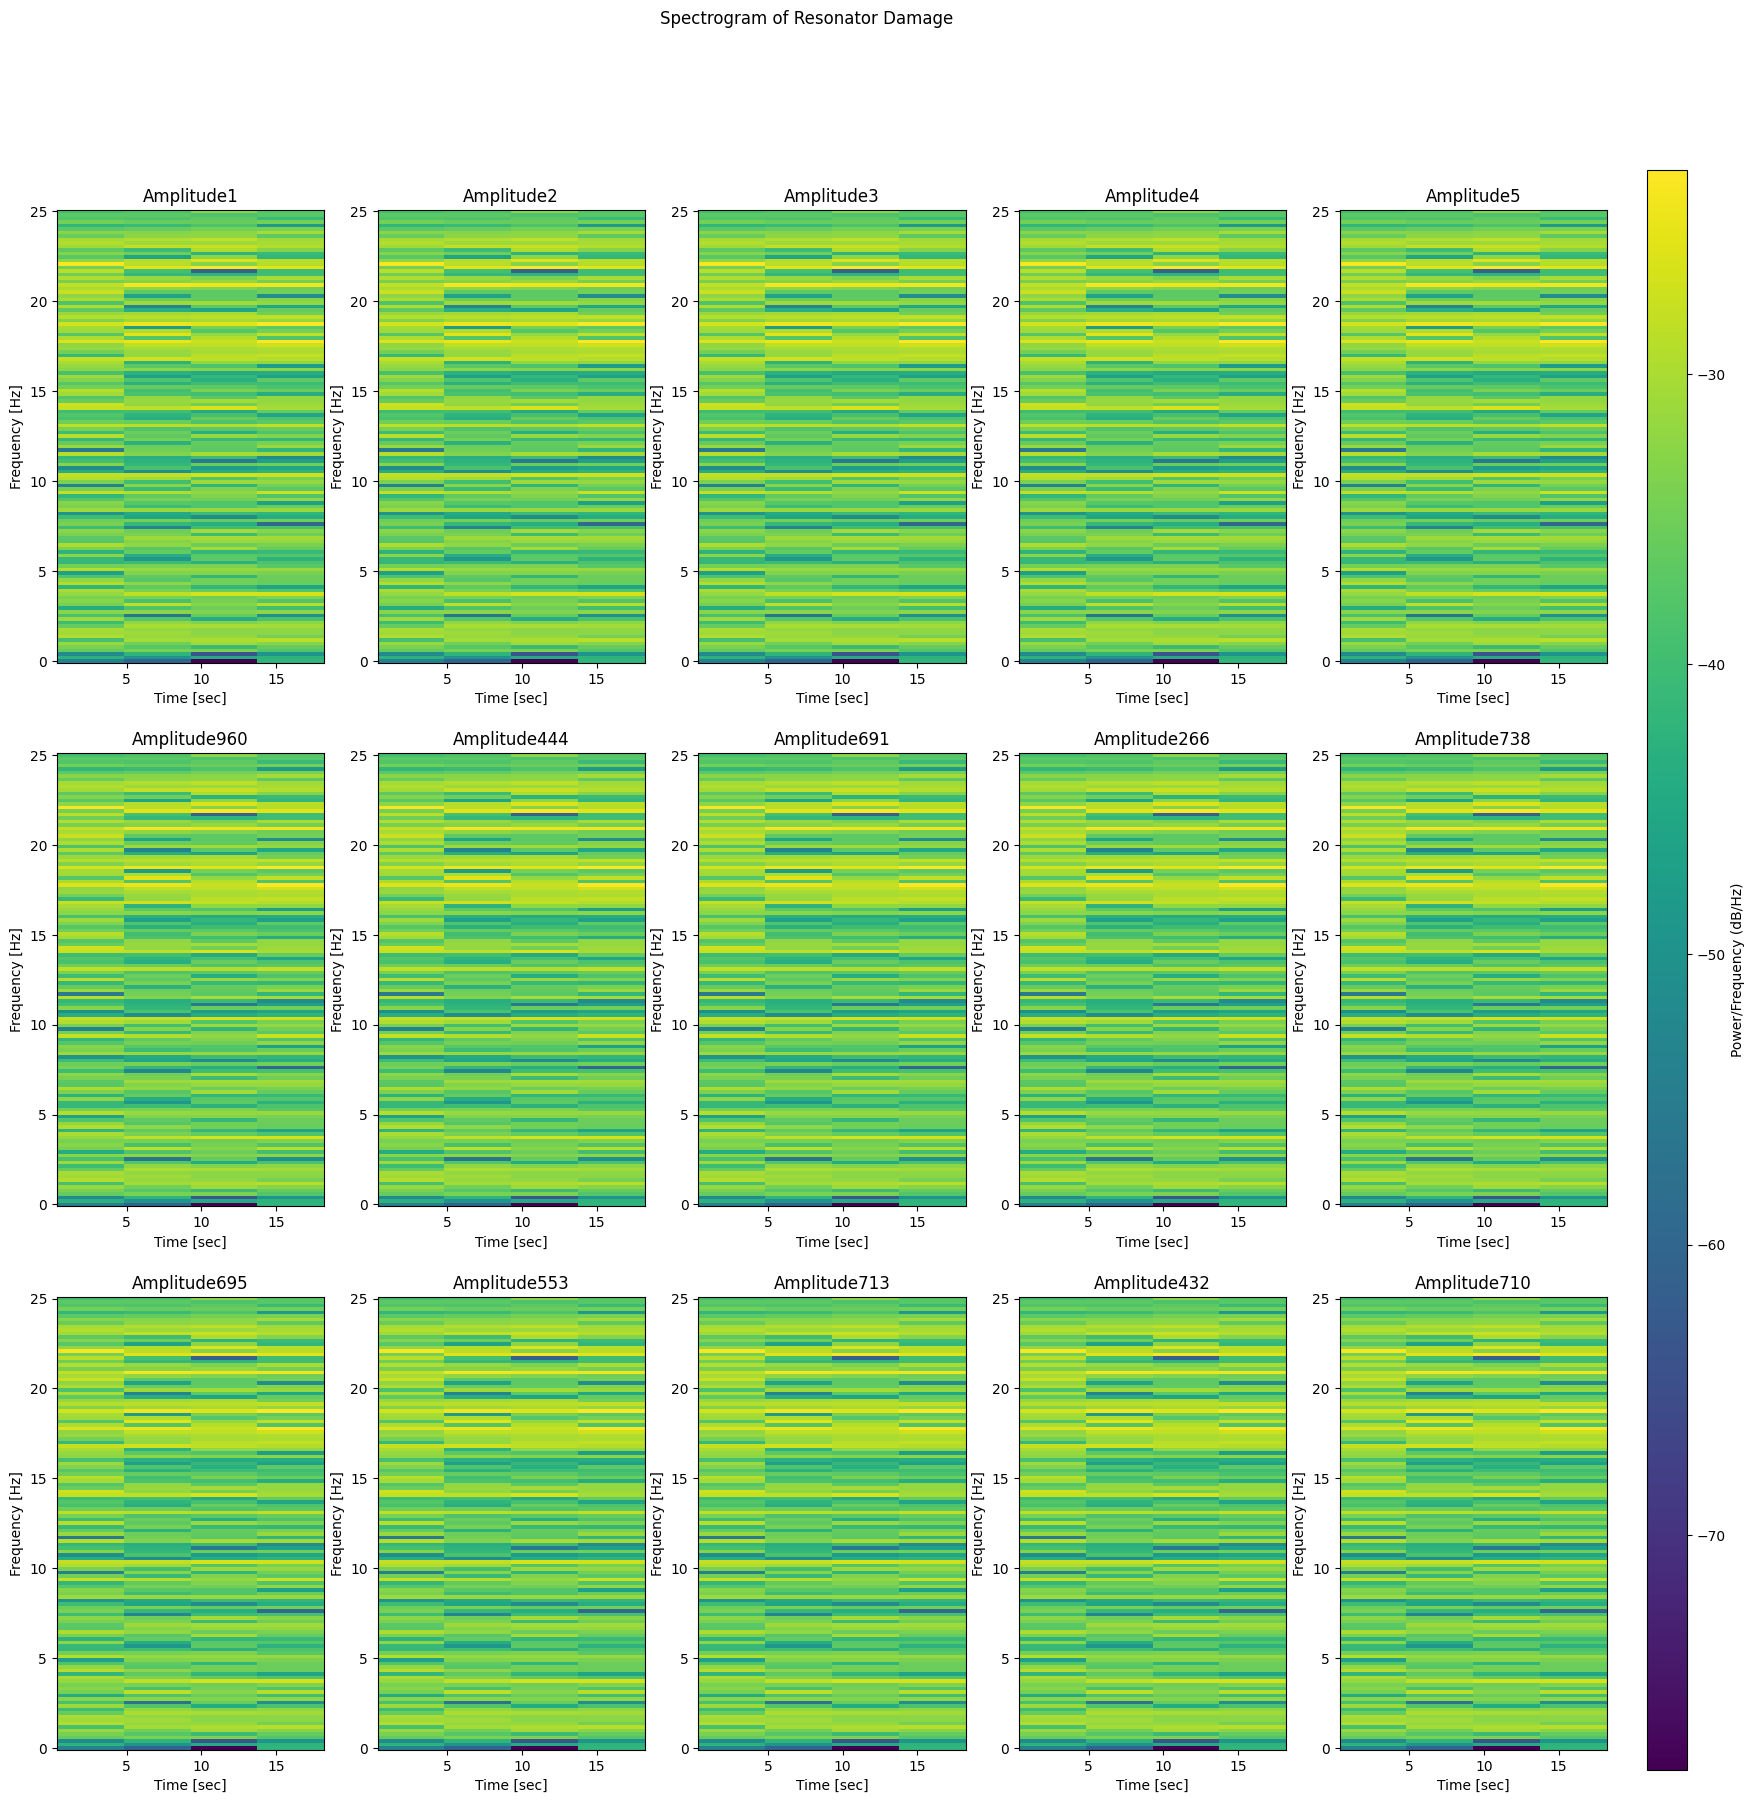

In [28]:
generate_spectrogram(3, 5, 20, 20, resonator, amplitude_nums, time, 'Resonator Damage')

#### Diaphragm Damage

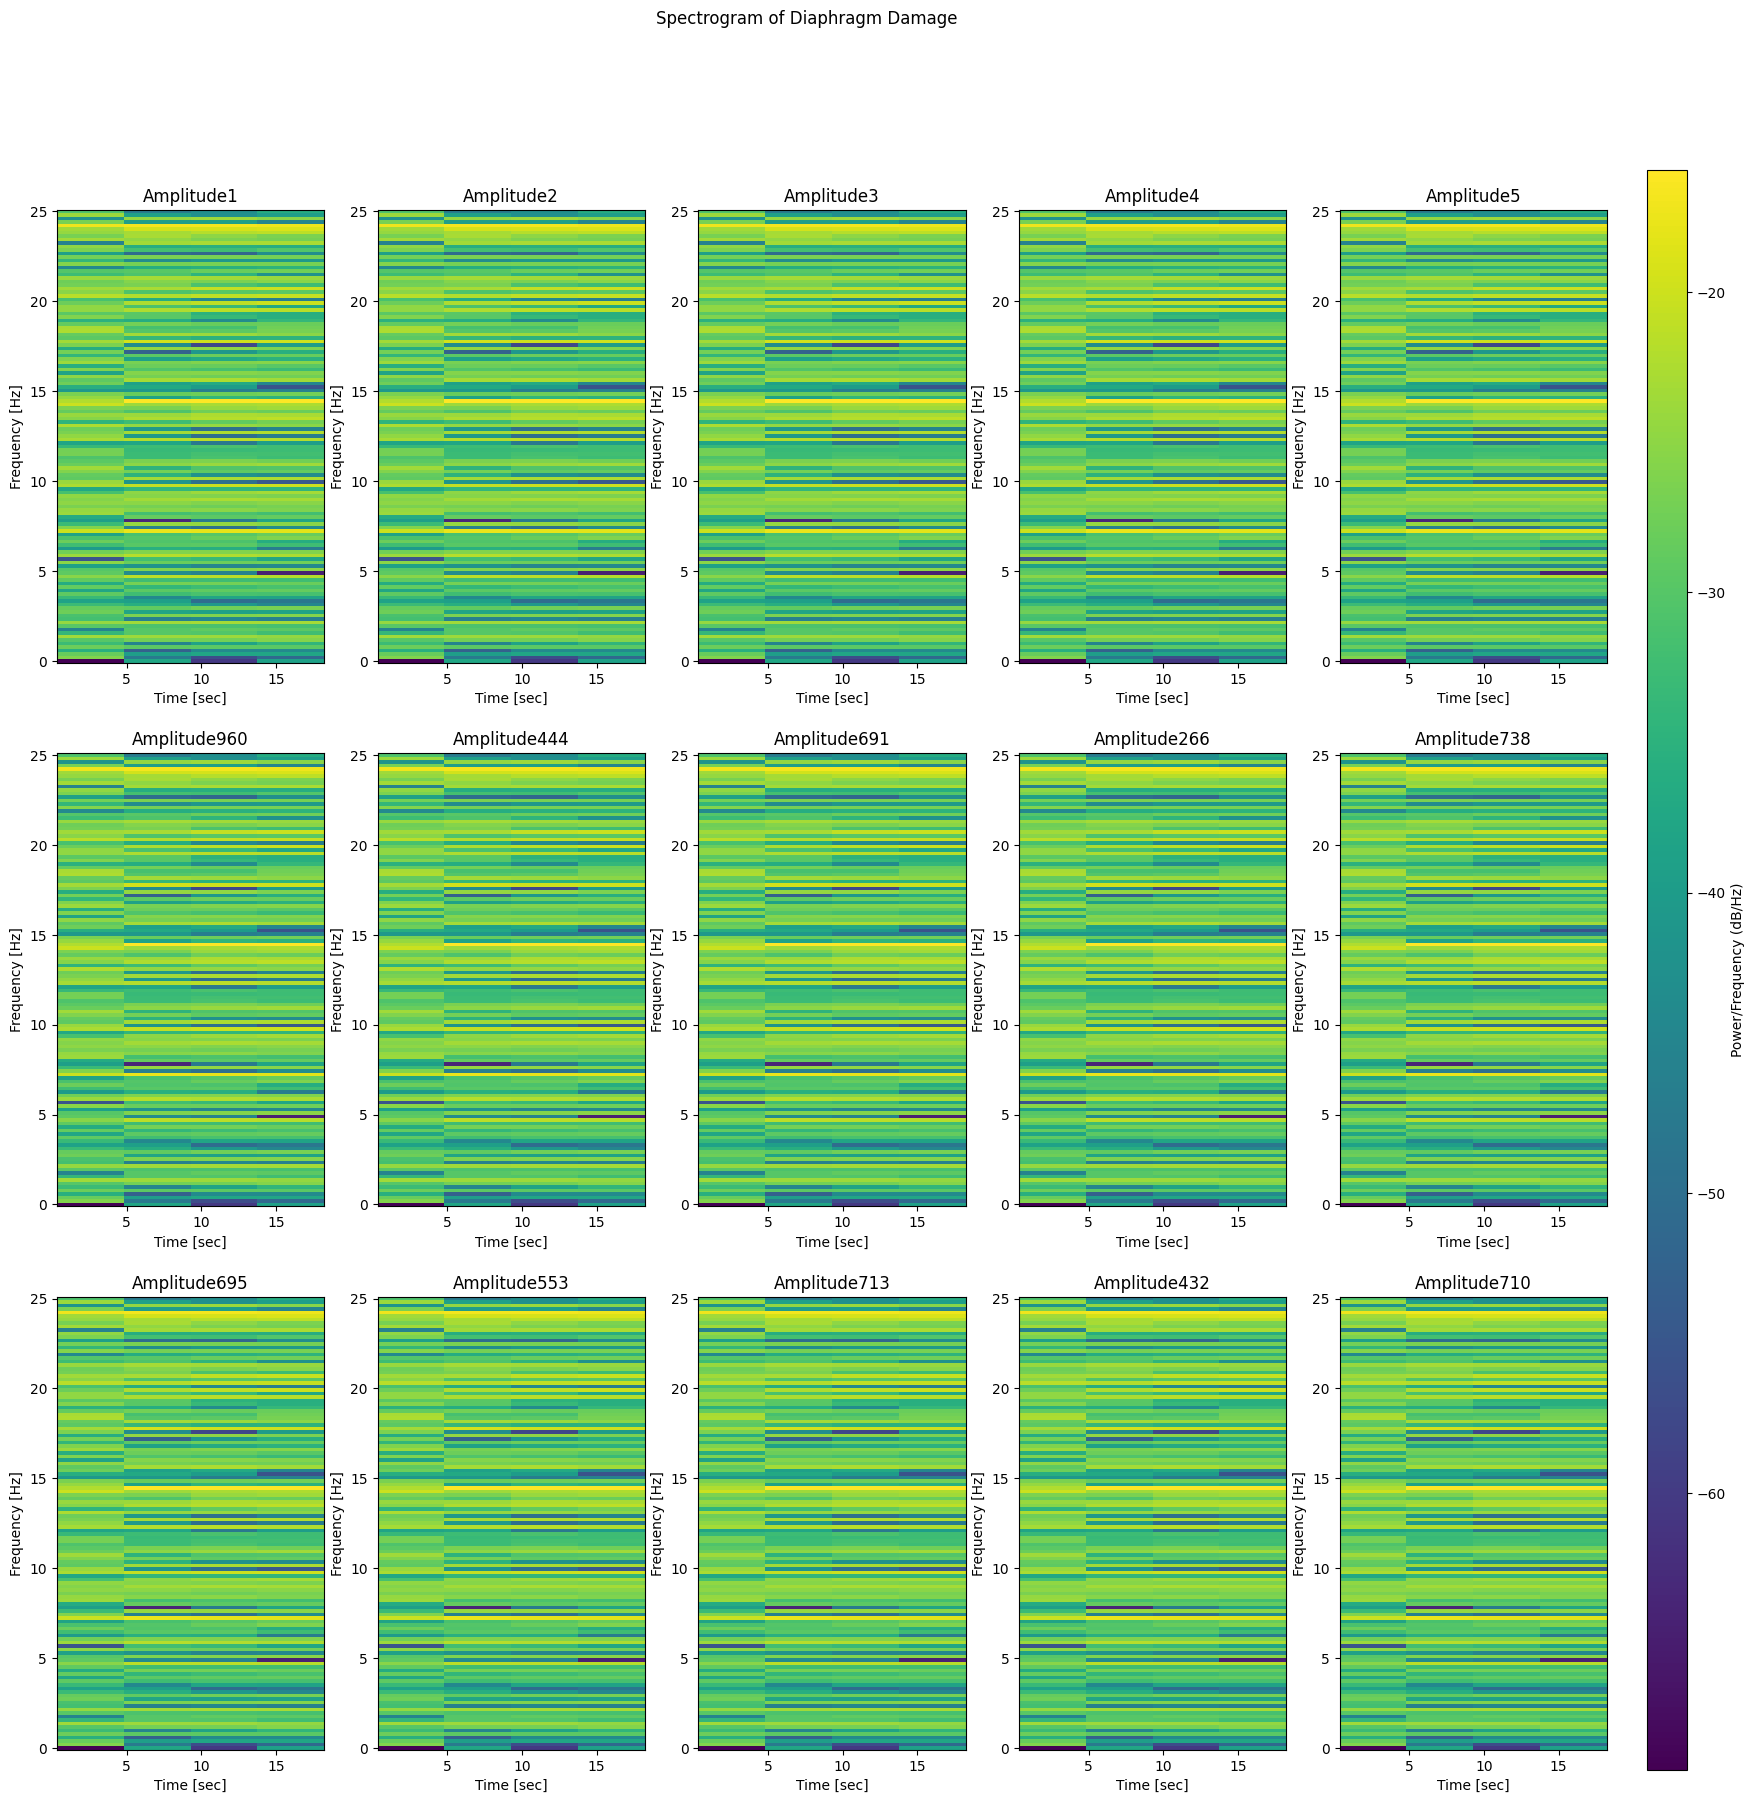

In [29]:
generate_spectrogram(3, 5, 20, 20, diaphragm, amplitude_nums, time, 'Diaphragm Damage')